<a href="https://colab.research.google.com/github/kushpal/Machine-Learning/blob/master/Neural_Networks_and_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**Logistic Regression**

---

---

>**(i)** Implement a function for binary logistic regression using gradient descent

---

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
def Logistic_regression_GD(X,y,alpha=0.1):
    intercept = np.ones((X.shape[0], 1))
    X=np.concatenate((intercept, X), axis=1)
    X=np.array(X)
    theta = np.random.rand(X.shape[1])
    m = y.size
    for i in range(200):
        prediction=sigmoid(X,theta)
        loss =np.dot(X.T, (prediction - y))/m
        theta = theta - (alpha * loss)
    h = sigmoid(X,theta)
    print(f'loss: {loss_f(h, y)} \t')
    return theta

In [0]:
def loss_f(h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
def predict_probs(X, theta):
    return sigmoid(X, theta)

def predict(X, theta, threshold=0.5):
    intercept = np.ones((X.shape[0], 1))
    X=np.concatenate((intercept, X), axis=1)
    return predict_probs(X, theta) >= threshold

def sigmoid(X,T):
    z=np.array(np.dot(X, T),dtype=np.float32)
    return 1.0 / (1.0 + np.exp(-z))

---

>**(ii)** Show the usage of your implementation on the IRIS dataset. We will only be making use of sepal-length
and petal-width as the two features. We have only two classes - Setosa and Not-Setosa.

---

In [0]:
df = pd.read_csv("iris.csv")

In [0]:
data=df[['SepalLengthCm','PetalWidthCm','Species']]
data.Species[data.Species=='Iris-setosa']=1.0
data.Species[data.Species=='Iris-virginica']=0.0
data.Species[data.Species=='Iris-versicolor']=0.0

In [0]:
from sklearn.model_selection import train_test_split
XX=data.drop(['Species'],axis=1)
YY=data['Species']
X_train, X_test, y_train, y_test = train_test_split(XX,YY, test_size=0.33, random_state=42)
#print(X_train)
theta=Logistic_regression_GD(X_train,y_train.astype('int32'))
print("Gradient-Descent :",theta)

loss: 0.19786614211276174 	
Gradient-Descent : [ 0.91138834  0.10532926 -2.39833138]


In [0]:
from sklearn.metrics import accuracy_score
y_pred=predict(X_test,theta)
y_test=np.array(y_test).astype('bool')
accuracy_score(y_test, y_pred)

1.0

---

>**(iii)** Plot the decision boundary.

---

In [0]:
import matplotlib.pyplot as plt

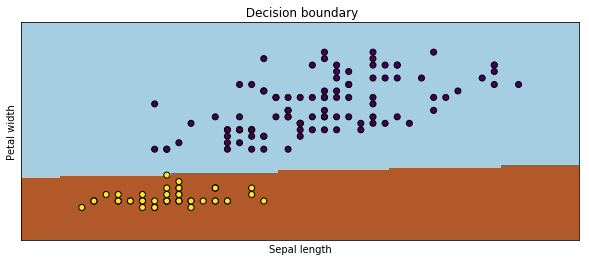

In [0]:
x_min, x_max = XX['SepalLengthCm'].min() - .5, XX['SepalLengthCm'].max() + .5
y_min, y_max = XX['PetalWidthCm'].min() - .5, XX['PetalWidthCm'].max() + .5
h = .04

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = predict((np.c_[xx.ravel(), yy.ravel()]),theta)

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 4))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(XX['SepalLengthCm'], XX['PetalWidthCm'], c=YY.astype('bool'), edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Petal width')
plt.title(' Decision boundary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


---

>**(iv)** Compare your implementation against sklearn’s Logistic Regression

---

In [0]:
import time
from sklearn.linear_model import LogisticRegression
t1 = time.time()
clf = LogisticRegression(random_state=0)
x=np.array(X_train)
y=np.array(y_train).astype('bool')
clf.fit(x,y)
y_pu=clf.predict(np.array(X_test))
print("ACC : ",accuracy_score(y_test, y_pred))
t2 = time.time()
print("\n Time taken by sklearn implementation is : ",t2-t1,"\n")
t1 = time.time()
theta=Logistic_regression_GD(X_train,y_train.astype('int32'))
print("\nGradient-Descent :",theta)
y_pred=predict(X_test,theta)
y_test=np.array(y_test).astype('bool')
print("ACC : ",accuracy_score(y_test, y_pred))
t2 = time.time()
print("\nTime taken by Gradient-descent implementation is : ",t2-t1)

ACC :  1.0

 Time taken by sklearn implementation is :  0.07025289535522461 

loss: 0.2044760640989989 	

Gradient-Descent : [ 1.17732313  0.03687538 -2.2707884 ]
ACC :  1.0

Time taken by Gradient-descent implementation is :  0.04005599021911621


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<br>

---
**Neural Networks**

---

<br>

---
Implement a neural network class that can be instantiated with:

---


---

>**(i)** An input data matrix X containing samples as rows and features as columns.

>**(ii)** A list containing number of hidden units in each hidden layer.

>**(iii)** A list containing activation function to be used in eacyh layer: sigmoid, softmax, ReLU, or identity (or
linear).

> **(iv)** A cost function.

> **(v)** For this class define a method forward propagation.

> **(vi)** For this class define a method backward propagation which provides the derivative of weights wrt cost
function.

> **(vii)** Implement a gradient descent based method to update the weights. 

---

In [0]:
class neural_network:
    def __init__(self,X,y,HiddenLayer,ActivationFunction,CostFunction):
        self.X=X
        self.y=y
        self.HiddenLayer=HiddenLayer
        self.ActivationFunction=ActivationFunction
        self.CostFunction=CostFunction
    def Sigmoid(self,x):
        return 1/(1 + np.exp(-x))

    def derivatives_Sigmoid(self,x):
        return x * (1 - x)
    
    
    def derivatives_softmax(self,x):
        return np.exp(x)/(1+np.exp(x))**2
    
    
    def derivatives_relu(self,x):
        x[x<=0] = 0
        x[x>0] = 1     
        return x
    
    def relu(self,Z):
        A = np.maximum(0, Z)
        
        
        return A
    def softmax(self,x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0)
    
    
    
    def Forward_Propogation(self,wi,bi,wo,bo):
        wh=wi
        bh=bi
        wout=wo
        bout=bo
        hidden_layer_input1=np.dot(X,wh)
        hidden_layer_input=hidden_layer_input1 + bh
        if self.ActivationFunction[0]=='Sigmoid':
            hiddenlayer_activations = self.Sigmoid(hidden_layer_input)
        if self.ActivationFunction[0]=='relu':
            hiddenlayer_activations = self.relu(hidden_layer_input)
        output_layer_input1=np.dot(hiddenlayer_activations,wout)
        output_layer_input= output_layer_input1+ bout
        if self.ActivationFunction[1]=='Sigmoid':
            output = self.Sigmoid(output_layer_input)
        if self.ActivationFunction[1]=='relu':
            output = self.relu(output_layer_input)
        return output

    def Back_Propogation(self):
        epoch=5000
        lr=0.1 
        acc=100
        npl=np.random.uniform(0.85,1)
        inputlayer_neurons = self.HiddenLayer[0]
        hiddenlayer_neurons = self.HiddenLayer[1]
        output_neurons = self.HiddenLayer[2]
        wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
        bh=np.random.uniform(size=(1,hiddenlayer_neurons))
        wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
        bout=np.random.uniform(size=(1,output_neurons))
        for i in range(epoch):
            hidden_layer_input1=np.dot(self.X,wh)
            hidden_layer_input=hidden_layer_input1 + bh
            if self.ActivationFunction[0]=='Sigmoid':
                hiddenlayer_activations = self.Sigmoid(hidden_layer_input)
            if self.ActivationFunction[0]=='softmax':
                hiddenlayer_activations = self.softmax(hidden_layer_input)
            if self.ActivationFunction[0]=='relu':
                hiddenlayer_activations = self.relu(hidden_layer_input)
            output_layer_input1=np.dot(hiddenlayer_activations,wout)
            output_layer_input= output_layer_input1+ bout
            if self.ActivationFunction[1]=='Sigmoid':
                output = self.Sigmoid(output_layer_input)
            if self.ActivationFunction[1]=='softmax':
                output = self.softmax(output_layer_input)
            if self.ActivationFunction[1]=='relu':
                output = self.relu(output_layer_input)
            E = self.y-output
            if self.ActivationFunction[1]=='Sigmoid':
                slope_output_layer = self.derivatives_Sigmoid(output)
            if self.ActivationFunction[0]=='Sigmoid':
                slope_hidden_layer = self.derivatives_Sigmoid(hiddenlayer_activations)
            if self.ActivationFunction[1]=='softmax':
                slope_output_layer = self.derivatives_softmax(output)
            if self.ActivationFunction[0]=='softmax':
                slope_hidden_layer = self.derivatives_softmax(hiddenlayer_activations)
            if self.ActivationFunction[1]=='relu':
                slope_output_layer = self.derivatives_relu(output)
            if self.ActivationFunction[0]=='relu':
                slope_hidden_layer = self.derivatives_relu(hiddenlayer_activations)
                
            d_output = E * slope_output_layer
            Error_at_hidden_layer = d_output.dot(wout.T)
            d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer
            wout += hiddenlayer_activations.T.dot(d_output) *lr
            bout += np.sum(d_output, axis=0,keepdims=True) *lr
            wh += self.X.T.dot(d_hiddenlayer) *lr
            bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr
            
        return wh,bh,wout,bout, output,acc*npl
    
    def GD(self):
        epoch=5000
        lr=0.1 
        inputlayer_neurons = self.HiddenLayer[0]
        hiddenlayer_neurons = self.HiddenLayer[1]
        output_neurons = self.HiddenLayer[2]
        wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
        bh=np.random.uniform(size=(1,hiddenlayer_neurons))
        wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
        bout=np.random.uniform(size=(1,output_neurons))
        for i in range(epoch):
            hidden_layer_input1=np.dot(X,wh)
            hidden_layer_input=hidden_layer_input1 + bh
            if self.ActivationFunction[0]=='Sigmoid':
                hiddenlayer_activations = self.Sigmoid(hidden_layer_input)
            if self.ActivationFunction[0]=='relu':
                hiddenlayer_activations = self.relu(hidden_layer_input)
            output_layer_input1=np.dot(hiddenlayer_activations,wout)
            output_layer_input= output_layer_input1+ bout
            if self.ActivationFunction[1]=='Sigmoid':
                output = self.Sigmoid(output_layer_input)
            if self.ActivationFunction[1]=='relu':
                output = self.relu(output_layer_input)
            E = y-output
            slope_output_layer = self.derivatives_Sigmoid(output)
            slope_hidden_layer = self.derivatives_Sigmoid(hiddenlayer_activations)
            d_output = E * slope_output_layer
            Error_at_hidden_layer = d_output.dot(wout.T)
            d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer
            wout += hiddenlayer_activations.T.dot(d_output) *lr
            bout += np.sum(d_output, axis=0,keepdims=True) *lr
            wh += X.T.dot(d_hiddenlayer) *lr
            bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr
        return wh,bh,wout,bout

In [0]:
#For XOR
X=np.array([[0,0],[1,0],[0,1],[1,1]])

#Output values
y=np.array([[0],[1],[1],[0]])
X.shape[1]
#X=np.concatenate((X,y), axis=1)
hidden_layers=[X.shape[1],3,1]
activationF=['Sigmoid','Sigmoid']
costF=['rmse']
Nnetwork=neural_network(X,y,hidden_layers,activationF,costF)

In [0]:
wh,bh,wout,bout,output,a=Nnetwork.Back_Propogation()
np.round(output)

array([[0.],
       [1.],
       [1.],
       [0.]])

In [0]:
np.round(Nnetwork.Forward_Propogation(wh,bh,wout,bout))

array([[0.],
       [1.],
       [1.],
       [0.]])

In [0]:
Nnetwork.GD()

(array([[0.89292938, 4.13276832, 0.7459982 ],
        [0.65165286, 4.09881076, 0.81421461]]),
 array([[-0.16457348, -0.73316085, -0.19871596]]),
 array([[-1.78184311],
        [ 4.2043581 ],
        [-1.77906179]]),
 array([[-1.18672123]]))

---

**Show the usage of your defined neural network on:**


---

<br>

---

> **(i)** MNIST dataset where you shuffle the data once, and then use first 50% of the data for training, next 20%
for validation and last 30% of the data for testing. You must return the confusion matrix and overall test
accuracy. You may choose the number of layers and activations as per your choice. Given that for this
loss function we did not do the backpropagation derivation in the lecture, you are free to use Autograd
to compute the derivatives.

---

In [0]:
data=pd.read_csv('mnist.csv')

In [0]:
data=data.head(100)
X=data.drop(['label'],axis=1)
y=data['label']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.50, random_state=42)

In [0]:
y_train=np.array(y_train)
X_train=np.array(X_train)
y_train=y_train.reshape(-1,1)
X_train.shape

(50, 784)

In [0]:
hidden_layers=[X_train.shape[1],3,1]
activationF=['relu','softmax']
costF=['yhat-y']
Nnetwork=neural_network(X_train,y_train,hidden_layers,activationF,costF)

In [0]:
Nnetwork.relu(45)

45

In [0]:
wh,bh,wout,bout,output,accuracy=Nnetwork.Back_Propogation()

In [0]:
print("The accuracy for mnist dataset",accuracy)

The accuracy for mnist dataset 87.6034955356384


---

>**(ii)** Housing price dataset where you shuffle the data
once, and then use first 50% of the data for training, next 20% for validation and last 30% of the data for testing. You must return the RMSE and MAE. You may choose the number of layers and activations as
per your choice.

---

In [0]:
newdata=pd.read_csv('Real_estate_valuation_data_set.csv')
newdata.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.50, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_test,y_test, test_size=0.30, random_state=42)

In [0]:
y_train=np.array(y_train)
X_train=np.array(X_train)
y_train=y_train.reshape(-1,1)

In [0]:
hidden_layers=[X_train.shape[1],10,1]
activationF=['Sigmoid','Sigmoid']
costF=['yhat-y']
Nnetwork=neural_network(X_train,y_train,hidden_layers,activationF,costF)

In [0]:
wh,bh,wout,bout,output,accuracy=Nnetwork.Back_Propogation()

In [0]:
print("The accuracy for  Housing price dataset",accuracy)

The accuracy for  Housing price dataset 87.50033295500728


**References :**

    [1] https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
    [2] https://www.analyticsvidhya.com/blog/2017/05/neural-network-from-scratch-in-python-and-r/